# What is probability? A simulated introduction

In [10]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Introduction to Bayesian Stats via Simulation

This is a condensed tutorial for Bayesian statistical modeling for people who approach things from a computer science POV, subsetted out of Eric Ma's excellent [tutorial](https://github.com/ericmjl/bayesian-stats-modelling-tutorial) to run for a much shorter time. I assume no math knowledge outside of arithmetic (though there is one proof) and some competence with NumPy, Pandas, and Python control flow (loops, conditionals, et cetera). In order to get through all the material, we'll have to rush through a fair amount of the exercises. I'd suggest that if you don't know all those things above to pair up with someone who does. The concepts are more important than their implementation, so don't get concerned if you don't have time to finish every exercise.


### Table of Contents:

1. Setup.

    1. This one is interactive, so either clone this repository and use conda: 
    ~~~~~
    git clone https://github.com/ericmjl/bayesian-stats-modelling-tutorial
    cd bayesian-stats-modelling-tutorial
    conda env create -f environment.yml
    conda activate bayesian-modelling-tutorial
    ~~~~~
    2. Use this Binder link to run the notepad:
        > Remember to get the binder link before it's time to do this talk.

2. Introduction to Probability:
    1. What's probability? 
        1. Bayesian perspective.
        2. Frequentist perspective.
    2. Model real-world phenomena with probability distributions.
    3. Model joint and conditional probabilities.
    4. Understand Bayes' theorem.

## What's Probability?

> To the pioneers such as Bernoulli, Bayes and Laplace, a probability represented a _degree-of-belief_ or plausibility; how much they thought that something was true, based on the evidence at hand. To the 19th century scholars, however, this seemed too vague and subjective an idea to be the basis of a rigorous mathematical theory. So they redefined probability as the _long-run relative frequency_ with which an event occurred, given (infinitely) many repeated (experimental) trials. Since frequencies can be measured, probability was now seen as an objective tool for dealing with _random_ phenomena.

-- _Data Analysis, A Bayesian Tutorial_, Sivia & Skilling (p. 9)

What type of random phenomena are we talking about here? One example is:

1. Knowing that a website has a click-through rate (CTR) of 10%, we can calculate the probabilty of having 10 people, 9 people, 8 people ... and so on click through, upon drawing 10 people randomly from the population;
2. But given the data of how many people click through, how can we calculate the CTR? And how certain can we be of this CTR? Or how likely is a particular CTR?

Or, in other words, for #1 we want to calculate $P(\text{ data } | \text{ model })$.
For #2 we want to calculate $P(\text{ model } | \text{ data })$.

Let's start by answering questions of type #1, with programming.

## 2. Simulating probabilities

* Let's say that a website has a CTR of 50%, i.e. that 50% of people click through. If we picked 1,000 people at random from the population, how likely would it be to find that a certain number of people click?

We can simulate this using `numpy`'s random number generator.

To do so, first note we can use `np.random.rand(size=N)` to randomly select floats between 0 and 1 (known as the _uniform distribution_). Below, we do so and plot a histogram:

In [11]:
#Import numpy and pyplot.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Draw 1,000 samples from uniform & plot results
x = np.random.rand(1000)
plt.hist(x);

To then simulate the sampling from the population, we check whether each float was greater or less than 0.5. If less than or equal to 0.5, we say the person clicked.

In [12]:
# Computed how many people click
clicks = ___
n_clicks = ___
f"Number of clicks = {n_clicks}"

'Number of clicks =     band species  blength  bdepth\n0  19022  fortis     10.0     8.5\n1  19028  fortis     12.5     8.9\n2  19032  fortis      9.3     7.5\n3  19041  fortis     10.3     9.6\n4  19044  fortis     11.0     9.2'

The proportion of people who clicked can be calculated as the total number of clicks over the number of people:

In [13]:
# Computed proportion of people who clicked
proportion = ___
f"Proportion who clicked = {proportion}"

'Proportion who clicked = '

**Discussion**: Did you get the same answer as your neighbour? If you did, why? If not, why not?

**Up for discussion:** Let's say that all you had was this data and you wanted to figure out the CTR (probability of clicking). 

* What would your estimate be?
* Bonus points: how confident would you be of your estimate?

**Note:** If you're more interested in the mathematical rather than the conceptual foundations of probability, Mike Betancourt has an elegant [Introduction to Probability Theory (For Scientists and Engineers)](https://betanalpha.github.io/assets/case_studies/probability_theory.html) that I can recommend.

### Hands-on: more clicking

Use random sampling to simulate how many people out of 1,000 click when the CTR is 0.7. How many click? What proportion?

In [14]:
# Compute number of clicks and proportion
clicks = ___
n_clicks = ___
print(f"Number of clicks = {___}")
print(f"Proportion who clicked = {___}")

Number of clicks =     band species  blength  bdepth
0  19022  fortis     10.0     8.5
1  19028  fortis     12.5     8.9
2  19032  fortis      9.3     7.5
3  19041  fortis     10.3     9.6
4  19044  fortis     11.0     9.2
Proportion who clicked =     band species  blength  bdepth
0  19022  fortis     10.0     8.5
1  19028  fortis     12.5     8.9
2  19032  fortis      9.3     7.5
3  19041  fortis     10.3     9.6
4  19044  fortis     11.0     9.2


_Discussion point_: This model is know as the bias coin flip. 
- Can you see why?
- Can it be used to model other phenomena?

### Galapagos finch beaks

You can also calculate such proportions with real-world data. Here we import a dataset of Finch beak measurements from the Galápagos islands. You can find the data [here](https://datadryad.org/resource/doi:10.5061/dryad.9gh90).

In [15]:
# Import and view first 5 observations from data
import pandas as pd
df_12 = pd.read_csv('../data/finch_beaks_2012.csv')
df_12.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [16]:
# Store lengths in a pandas series
lengths = ___

* What proportion of birds have a beak length > 10 ?

In [17]:
p = ___
p

'Number of clicks =     band species  blength  bdepth\n0  19022  fortis     10.0     8.5\n1  19028  fortis     12.5     8.9\n2  19032  fortis      9.3     7.5\n3  19041  fortis     10.3     9.6\n4  19044  fortis     11.0     9.2'

**Obvious trick question for discussion.** : Have we calculated the probability of a bird having a beak length > 10? Why or why not?

### A proxy for probability

As a proxy for the probability, we can simulate drawing random samples (with replacement) from the data _repeatedly_, seeing how many lengths are > 10 and calculating the proportion (commonly referred to as [hacker statistics](https://speakerdeck.com/jakevdp/statistics-for-hackers)):


**Note:** In order to use such simulation and approaches to "prove" results such as the above, we're gliding over several coupled and deep technicalities. This is in the interests of the pedagogical nature of this introduction. For the sake of completeness, we'll mention that we're essentially using the proportion in our simulations as a proxy for the probability which is useful to allow you to start getting your hands dirty with probability via simluation.

Having stated this, for ease of instruction, we'll continue to do so when thinking about joint & conditional probabilities of both simulated and real data. 

In [18]:
n_samples = 10000
___

'Proportion who clicked = '

### Another way to simulate coin-flips

In the above, you have used the uniform distribution to sample from a series of biased coin flips. I want to introduce you to another distribution that you can also use to do so: the **binomial distribution**.

The **binomial distribution** with parameters $n$ and $p$ is defined as the probability distribution of

> the number of heads seen when flipping a coin $n$ times when  with $p(heads)=p$.

**Note:** Most distributions tell the _story_ of how the data were generated. Specifically, the **binomial distribution** is used if we believe that the underlying process generating the observed data has a binary outcome (affected by disease or not, head or not, 0 or 1, clicked through or not), and that one of the two outcomes occurs with probability $p$, then the probability of seeing a particular outcome is given by the **binomial distribution** with parameters $n$ and $p$.

We'll now use the binomial distribution to answer the same question as above:
* If P(heads) = 0.7 and you flip the coin ten times, how many heads will come up?

We'll also set the seed to ensure reproducible results.

In [19]:
# Set seed
___

# Simulate one run of flipping the biased coin 10 times
___

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


### Simulating many times to get the distribution

In the above, we have simulated the scenario once. But this only tells us one potential outcome. To see how likely it is to get $n$ heads, for example, we need to simulate it a lot of times and check what proportion ended up with $n$ heads.

C:\Users\fusaro\Anaconda\envs\bayes\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


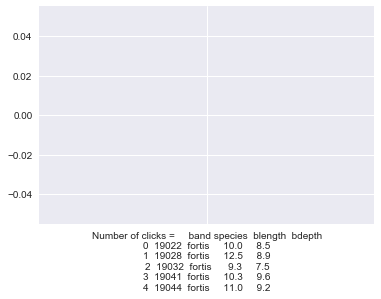

In [20]:
# Simulate 1,000 run of flipping the biased coin 10 times
x = ___

# Plot normalized histogram of results
plt.hist(x, density=True, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);

* **Up for Discussion**: what do you see in the above?

## Hands-on

- If I flip a biased coin ($P(H)=0.3$) 20 times, what is the probability of 5 or more heads?
- If I flip a fair coin 20 times, what is the probability of 5 or more heads?
    - If you happen to know the binomial distribution function, go ahead and calculate this.
    - Otherwise, use 1000 samples to simulate what happens.

In [21]:
# Calculate the probability of 5 or more heads for p=0.3.
___

'Number of clicks =     band species  blength  bdepth\n0  19022  fortis     10.0     8.5\n1  19028  fortis     12.5     8.9\n2  19032  fortis      9.3     7.5\n3  19041  fortis     10.3     9.6\n4  19044  fortis     11.0     9.2'

In [22]:
# Calculate the probability of 5 or more heads for p=0.5
___

'Proportion who clicked = '

- Plot the normalized histogram of number of heads of the following experiment: flipping a fair coin 10 times.

In [8]:
# Plot histogram 
x = ___
___;

## 3. Joint Probability & Conditional Probability

### Joint Probability

We have already encountered joint probabilities above, perhaps without knowing it: $P(A,B)$ is the probability two events $A$ and $B$ _both_ occurring.
* For example, getting two heads in a row.

If $A$ and $B$ are independent, then $P(A,B)=P(A)P(B)$ but be warned: this is not always (or often) the case.

One way to think of this is considering "AND" as multiplication: the probability of A **and** B is the probability of A **multiplied** by the probability of B.

### JOINT PROBABILITY COIN FLIPPING

Verify that $P(A,B)=P(A)P(B)$ in the two fair coin-flip case (A=heads, B=heads) by 
- first simulating two coins being flipped together and calculating the proportion of occurences with two heads;
- then simulating one coin flip and calculating the proportion of heads and then doing that again and multiplying the two proportions.

Your two calculations should give "pretty close" results and not the same results due to the (in)accuracy of simulation. 

In [ ]:
# Calculate P(A,B)
# Generate data of 2 coins flipped together 10,000 times
x_0 = ___ 
p_ab = ___
# Plot histogram of results
___;
print(p_ab)

In [23]:
# Calculate P(A)P(B)
x_1 = np.random.binomial(1,0.5,10000)
x_2 = np.random.binomial(1,0.5,10000)
p_a = ___
p_b = ___
p_a*p_b

TypeError: can't multiply sequence by non-int of type 'str'

### HANDS-ON: joint probability for birds

What is the probability that two randomly selected birds have beak depths over 10 ?

In [24]:
# Calculate P(A)P(B) of two birds having beak lengths > 10
p_a = ___
p_b = ___
p_a*p_b

SyntaxError: unexpected character after line continuation character (<ipython-input-24-4ec24e24e13c>, line 2)

* Calculate the joint probability using the resampling method, that is, by drawing random samples (with replacement) from the data. First calculate $P(A)P(B)$:

In [ ]:
# Calculate P(A)P(B) using resampling methods
n_samples = 100000
p_a = sum(___)/n_samples
p_b = sum(___)/n_samples
p_a*p_b

Now calculate $P(A,B)$:

In [ ]:
# Calculate P(A,B) using resampling methods
n_samples = 100000
samples = ___
_ = samples > (10,10)
p_ab = ___/n_samples
p_ab

**Task:** Interpret the results of your simulations.

### Conditional Probability

Now that we have a grasp on joint probabilities, lets consider conditional probabilities, that is, the probability of some $A$, knowing that some other $B$ is true. We use the notation $P(A|B)$ to denote this. For example, you can ask the question "What is the probability of a finch beak having depth $<10$, knowing that the finch of of species 'fortis'?"

#### Example: conditional probability for birds

1. What is the probability of a finch beak having depth > 10 ?
2. What if we know the finch is of species 'fortis'?
3. What if we know the finch is of species 'scandens'?

In [ ]:
___

In [ ]:
df_fortis = df_12.loc[df_12['species'] == 'fortis']
___

In [ ]:
df_scandens = df_12.loc[df_12['species'] == 'scandens']
___

**Note:** These proportions are definitely different. We can't say much more currently but we'll soon see how to use hypothesis testing to see what else we can say about the differences between the species of finches.

### Joint and conditional probabilities

Conditional and joint probabilites are related by the following:
$$ P(A,B) = P(A|B)P(B)$$

**Homework exercise for the avid learner:** verify the above relationship using simulation/resampling techniques in one of the cases above.

### Hands on example: drug testing

**Question:** Suppose that a test for using a particular drug is 99% sensitive and 99% specific. That is, the test will produce 99% true positive results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% (5 in 1,000) of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

**If we can answer this, it will be really cool as it shows how we can move from knowing $P(+|user)$ to $P(user|+)$, a MVP for being able to move from $P(data|model)$ to $P(model|data)$.**

In the spirit of this workshop, it's now time to harness your computational power and the intuition of simulation to solve this drug testing example. 

* Before doing so, what do you think the answer to the question _"What is the probability that a randomly selected individual with a positive test is a drug user?"_ is? Write down your guess.

In [ ]:
# Take 10,000 subjects
n = 100000
# Sample for number of users, non-users
users = ___
non_users = ___

In [ ]:
# How many of these users tested +ve ?
u_pos = ___
# How many of these non-users tested +ve ?
non_pos = ___

In [ ]:
# how many of those +ve tests were for users?
___

**Discussion**: What you have been able to do here is to solve the following problem: you knew $P(+|user)=0.99$, but you were trying to figure out $P(user|+)$. Is the answer what you expected? If not, why not?

**Key note:** This is related to the serious scientific challenge posed at the beginning here: if you know the underlying parameters/model, you can figure out the distribution and the result, but often we have only the experimental result and we're trying to figure out the most appropriate model and parameters.

It is Bayes' Theorem that lets us move between these.

## 4. Bayes' Theorem

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

As you may have guessed, it is Bayes' Theorem that will allow us to move back and forth between $P(data|model)$ and $P(model|data)$. As we have seen, $P(model|data)$ is usually what we're interested in as data scientists yet $P(data|model)$ is what we can easily compute, either by simulating our model or using analytic equations.

**One of the coolest things:** Bayes Theorem can be proved with a few lines of mathematics. Your instructor will do this on the chalk/white-board now.

### Bayes Theorem solves the above drug testing problem

Bayes Theorem can be used to analytically derive the solution to the 'drug testing' example above as follows.

From Bayes Theorem, 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+)}$$



We can expand the denominator here into 

$$P(+)  = P(+,user) + P(+,non-user) $$

so that

$$ P(+)=P(+|user)P(user) + P(+|non-user)P(non-user)$$

and 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+|user)P(user) + P(+|non-user)P(non-user)}$$.

Calculating this explicitly yields

$$P(user|+) = \frac{0.99\times 0.005}{0.99\times 0.005 + 0.01\times 0.995} = 0.332 $$

This means that if an individual tests positive, there is still only a 33.2% chance that they are a user! This is because the number of non-users is so high compared to the number of users.

Coming up: from Bayes Theorem to Bayesian Inference!